# <center>Lecture 4 - Feature Engineering and Regression Analysis - Part I</center>

### 在上一章中, 我們針對資料的轉換，清理和處理以及資料的理解上做了一些介紹。我們談到了一些標準的資料類型及其在整個資料過程中是如何被處理的的重要性。雖然這些技術是使用pandas模組來解釋的，但這些概念是通用的，也適用於大多數與資料分析相關的用例。我們也使用了seaborn, matplotlib這些python的視覺化模組做為繪製圖表的技術，來描述樣本資料。我們強烈建議您閱讀所引用的鏈接以進行深入理解。在接下來的章節中，我們以這些概念為基礎並將其應用於解決特定的實務問題。

In [1]:
# -*- coding: UTF-8 -*-
%autosave 120
%load_ext version_information
%version_information pandas, numpy, matplotlib, scipy, seaborn

Autosaving every 120 seconds


Software versions
Python 3.7.0 64bit [MSC v.1912 64 bit (AMD64)]
IPython 6.5.0
OS Windows 10 10.0.17134 SP0
pandas 0.23.4
numpy 1.15.1
matplotlib 2.2.3
scipy 1.1.0
seaborn 0.9.0
Mon Oct 29 11:23:27 2018 ¢Dx¢D_?D¡PCRE?!

In [2]:
# Define function to perform a side-by-side printing
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return
# Free Memory
def memoryClean(dirList):
    print('Total Process Memory Usages: %s' %psutil.Process().memory_info().rss)
    print('Memory Usage Statistics: %s' %str(psutil.virtual_memory()))
    reserved_vars = ['In', 'Out', 'exit', 'quit', 'ipython_vars', 
                     'side_by_side', 'memoryClean']
    # Display Memory Usage
    # sorted([(x, sys.getsizeof(globals().get(x))) for x in dir()
            # if not x.startswith('_') and
            # x not in sys.modules and
            # x not in ipython_vars],key=lambda x: x[1], reverse=True)
    for name in dirList:
        if not name.startswith('_') and name not in sys.modules and name not in reserved_vars:
            del globals()[name]
    import gc
    gc.collect()

# Create a Working Directory
IODataDir = "./Data_and_Images/"
import os
if not os.path.exists(IODataDir):
    os.makedirs(IODataDir)

## Contents

* [1. Feature Engineering and Feature Selection](#1.-Feature-Engineering-and-Feature-Selection)
    * [1.1 EDA Review - Pokemon Data Example](#1.1-EDA-Review---Pokemon-Data-Example)
        * [1.1.1 Cleaning the dataset](#1.1.1-Cleaning-the-dataset)
        * [1.1.2 How are Pokemon numbers distributed across generations?](#1.1.2-How-are-Pokemon-numbers-distributed-across-generations?)
        * [1.1.3 What are the most common types of Pokemon?](#1.1.3-What-are-the-most-common-types-of-Pokemon?)
        * [1.1.4 What are the strongest and weakest Pokemon species?](#1.1.4-What-are-the-strongest-and-weakest-Pokemon-species?)
        * [1.1.5 What are the strongest and weakest types of Pokemon?](#1.1.5-What-are-the-strongest-and-weakest-types-of-Pokemon?)
        * [1.1.6 Do any types of Pokemon excel at certain statistics over others?](#1.1.6-Do-any-types-of-Pokemon-excel-at-certain-statistics-over-others?)
        * [1.1.7 Are any of the statistics correlated?](#1.1.7-Are-any-of-the-statistics-correlated?)
        * [1.1.8 Pokémon for Machine Learning](#1.1.8-Pokémon-for-Machine-Learning)
    * [1.2 Feature Engineering on Numeric Data](#1.2-Feature-Engineering-on-Numeric-Data)
    * [1.3 Feature Engineering on Categorical Data](#1.3-Feature-Engineering-on-Categorical-Data)
    * [1.4 Feature Engineering on Text Data](#1.4-Feature-Engineering-on-Text-Data)
    * [1.5 Feature Engineering on Temporal Data](#1.5-Feature-Engineering-on-Temporal-Data)
    * [1.6 Feature Engineering on Image Data](#1.6-Feature-Engineering-on-Image-Data)
    * [1.7 Feature Scaling](#1.7-Feature-Scaling)
    * [1.8 Feature Selection](#1.8-Feature-Selection)
    * [1.9 Dimensionality Reduction](#1.9-Dimensionality-Reduction)

[Back to Contents](#Contents)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from IPython.display import display, HTML

In [4]:
# setting params
params = {'legend.fontsize': 'x-large','figure.figsize': (30, 10),
         'axes.labelsize': 'x-large', 'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
sns.set_style('whitegrid')
%matplotlib inline

[Back to Contents](#Contents)

![](./Data_and_Images/1.Predictive_Modeling.png)
![](./Data_and_Images/2.Data_Terminology.png)
![](./Data_and_Images/3.Terminology_Example.png)

## 1. Feature Engineering and Feature Selection
+  ### In the previous chapter, we have explored how one can retrieve, process, wrangle, and visualize data. Exploratory data analysis and visualizations are the first step toward understanding the data better. Understanding the data involves understanding the complete scope encompassing the data including the domain, constraints, qualification, quality and available attributes. 
+  ### A feature is an attribute or property shared by all of the independent samples on which analysis or prediction is to be done. Any attribute could be a feature, as long as it is useful to the model. The features in a data set are important to the predictive models we use and will influence the results we are going to achieve. The quality and quantity of the features will have great influence on whether the model is good or not. It seems that the better the features are, the better the result is. In fact, this is not entirely true, because the results achieved also depend on the model and the data, not just the chosen features. However, choosing the right features is still very important. Better features can produce simpler and more flexible models, and they often yield better results.
+  ### Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is difficult and take significant effort. As the nature of building Machine Learning systems is iterative, and hence extracting and engineering features from the dataset is not a one-time task. Feature engineering and selection is not a one-time process.
+  ### Data processing and feature engineering is often described to be the toughest task or step in building any Machine Learning system by data scientists. With the need of both domain knowledge as well as mathematical transformations, feature engineering is often said to be both an art as well as a science.  

### There are three similar but different tasks in the feature engineering workflow:
+ ### Feature extraction and feature engineering: transformation of raw data into features suitable for modeling;
+ ### Feature scaling/transformation: scaling/transformation of data to improve the accuracy of the algorithm;
+ ### Feature selection: removing unnecessary features.

### Some examples of engineering features.
+ ### Deriving a person’s age from birth date and the current date
+ ### Getting the average and median view count of specific songs and music videos
+ ### Extracting word and phrase occurrence counts from text documents
+ ### Extracting pixel information from raw images
+ ### Tabulating occurrences of various grades obtained by students

### In this section, we focus on various feature engineering techniques and strategies for the following major data types: Numeric data, Categorical data, Text data, Temporal data, and Image data

[Back to Contents](#Contents)

## 1.1 EDA Review - Pokemon Data Example 
#### The Pokemon dataset was made available on [Kaggle](https://www.kaggle.com/abcsds/pokemon). Another Pokemon dataset contains more variables (21 variables) is available on [Kaggle](https://www.kaggle.com/alopez247/pokemon)

In [5]:
pokemonDF = pd.read_csv(IODataDir+'/pokemon.csv', encoding = 'utf-8')
pokemonDF.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [6]:
pokemonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null object
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


#### The 'Type 2'  has missing values of around 400 records

Here's a quick description of each column, taken from Kaggle:
- ```#``` - Pokedex entry number of the Pokemon
- ```Name``` - name of the Pokemon
- ```Type 1``` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- ```Type 2``` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- ```Total``` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- ```HP``` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- ```Attack``` - the base modifier for normal attacks
- ```Defense``` - the base damage resistance against normal attacks
- ```Sp. Atk``` - special attack, the base modifier for special attacks
- ```Sp. Def``` - the base damage resistance against special attacks
- ```Speed``` - determines which Pokemon attacks first each round
- ```Generation``` - refers to which grouping/game series the Pokemon was released in
- ```Legendary``` - a boolean that identifies whether the Pokemon is legendary

[Back to Contents](#Contents)

## 1.1.1 Cleaning the dataset
### Let's rename the # column to id, and convert all column labels to lower case.

In [7]:
pokemonDF.rename(columns={'#': 'id'}, inplace=True)
pokemonDF.columns = pokemonDF.columns.str.lower()
pokemonDF.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


### Show all Pokemon with duplicated id values

In [8]:
pokemonDF[pokemonDF.duplicated('id', keep=False)].head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,Gen 1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,Gen 1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,Gen 1,False


In [9]:
side_by_side(pokemonDF[pokemonDF.duplicated('id', keep=False)].id.count(), 
             pokemonDF[pokemonDF.duplicated('id', keep=False)].id.nunique(),pokemonDF.shape)

144    65    (800, 13)



### Remove any Pokemon with duplicated id numbers except for the first instance

In [10]:
pokemonDF.drop_duplicates('id', keep='first', inplace=True)
pokemonDF.shape

(721, 13)

#### Replace any missing values in type 2 with 'None'

In [11]:
pokemonDF['type 2'].fillna(value='None', inplace=True)
pokemonDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 13 columns):
id            721 non-null int64
name          721 non-null object
type 1        721 non-null object
type 2        721 non-null object
total         721 non-null int64
hp            721 non-null int64
attack        721 non-null int64
defense       721 non-null int64
sp. atk       721 non-null int64
sp. def       721 non-null int64
speed         721 non-null int64
generation    721 non-null object
legendary     721 non-null bool
dtypes: bool(1), int64(8), object(4)
memory usage: 73.9+ KB


### The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, let's separate these two observational units into separate tables: `pokemonIdentityDF` and `pokemonStatisticsDF`.

In [12]:
pokemonIdentityDF = pokemonDF[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']]
pokemonStatisticsDF = pokemonDF[['id', 'hp', 'attack', 'defense', 'sp. atk','sp. def', 'speed','total']]

In [13]:
side_by_side(pokemonIdentityDF.shape, pokemonStatisticsDF.shape)
side_by_side(pokemonIdentityDF.head(), pokemonStatisticsDF.head())

(721, 6)    (721, 8)

   id        name type 1  type 2 generation  legendary       id  hp  attack  defense  sp. atk  sp. def  speed  total
0   1   Bulbasaur  Grass  Poison      Gen 1      False    0   1  45      49       49       65       65     45    318
1   2     Ivysaur  Grass  Poison      Gen 1      False    1   2  60      62       63       80       80     60    405
2   3    Venusaur  Grass  Poison      Gen 1      False    2   3  80      82       83      100      100     80    525
4   4  Charmander   Fire    None      Gen 1      False    4   4  39      52       43       60       50     65    309
5   5  Charmeleon   Fire    None      Gen 1      False    5   5  58      64       58       80       65     80    405



[Back to Contents](#Contents)

## 1.1.2 How are Pokemon numbers distributed across generations?

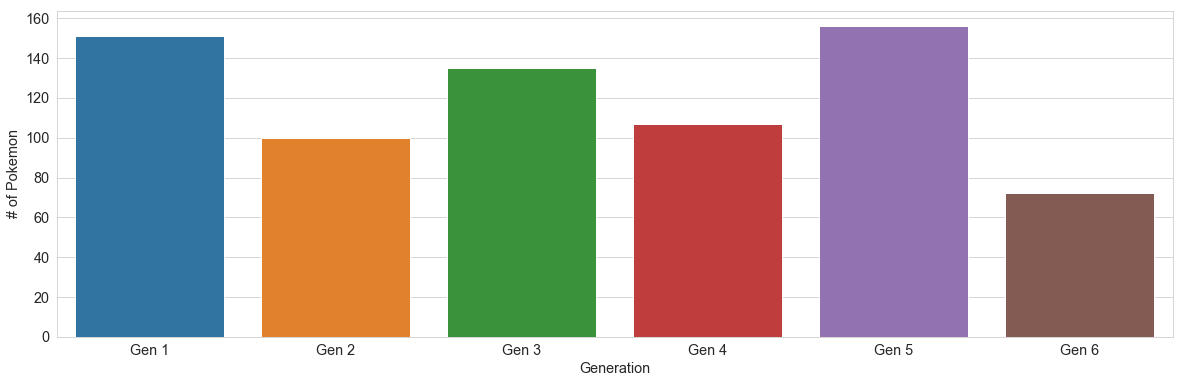

In [14]:
# Improve readability
fig,ax = plt.subplots(figsize=(20,6))
# Display a categorial histogram and label axes
sns.countplot(x='generation', data=pokemonIdentityDF, ax=ax)
ax.set(xlabel='Generation', ylabel= '# of Pokemon')
plt.show();

### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.
### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

In [15]:
pokemonIdentityDF['type 1'].nunique()

18

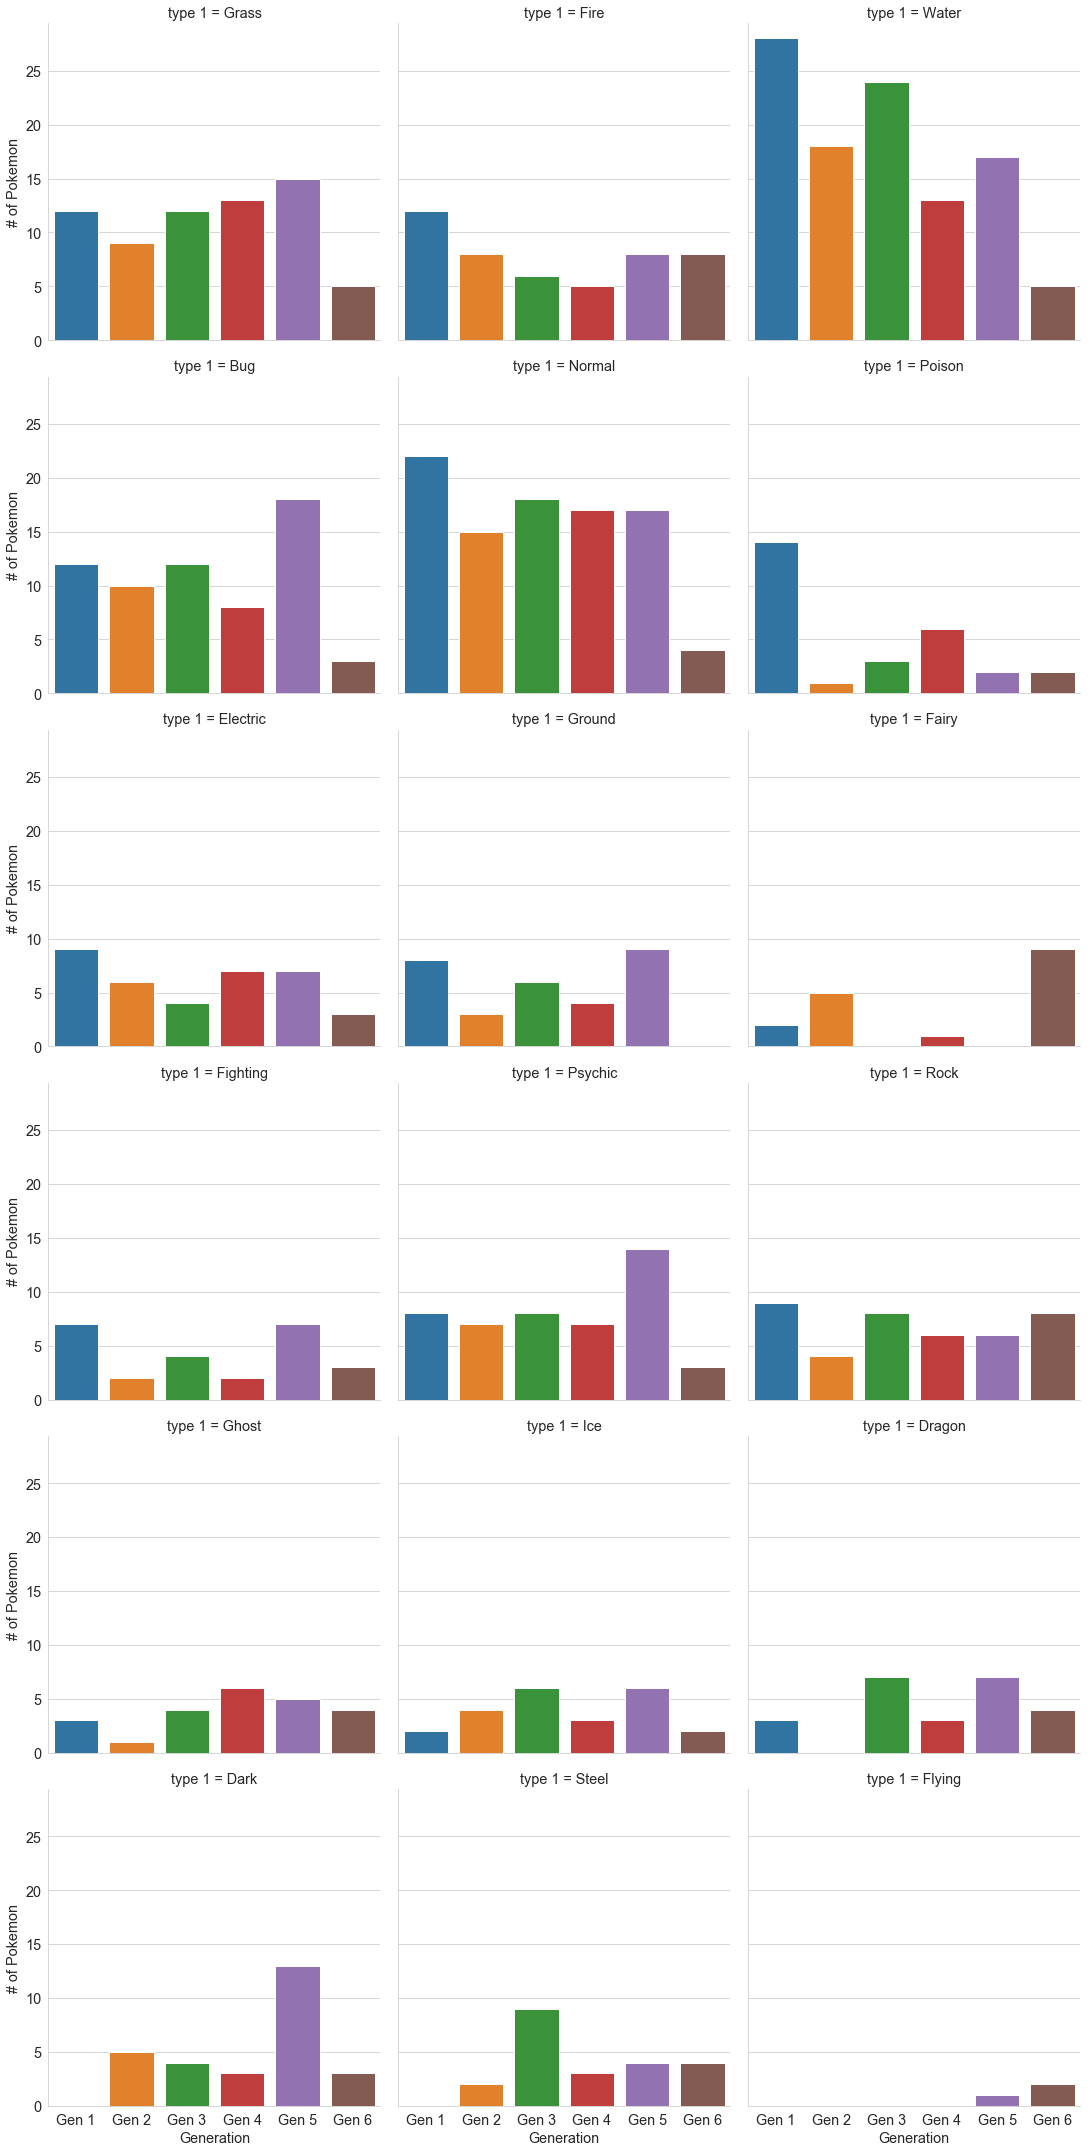

In [16]:
# Display a categorical histogram faceted by primary type and label axes
sns.catplot(x='generation', data=pokemonIdentityDF, col='type 1', 
            kind='count', col_wrap=3).set_axis_labels('Generation', '# of Pokemon');

### Most types of Pokemon have similar counts across generations but a few interesting tidbits standout:
- ### Generation 1 included quite a few Poison-type Pokemon but they've been more or less an afterthought in later generations.
- ### Generation 5 received a surge of new Psychic-type and Dark-type Pokemon, while Steel-type Pokemon received a large boost in generation 3.
- ### Normal-type Pokemon had a strong presence in every generation except generation 6.

[Back to Contents](#Contents)

## 1.1.3 What are the most common types of Pokemon?

In [17]:
pokemonIdentityDF.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,Gen 1,False
1,2,Ivysaur,Grass,Poison,Gen 1,False
2,3,Venusaur,Grass,Poison,Gen 1,False
4,4,Charmander,Fire,None,Gen 1,False
5,5,Charmeleon,Fire,None,Gen 1,False


In [18]:
side_by_side(pokemonIdentityDF['type 1'].nunique(), pokemonIdentityDF['type 2'].nunique())

18    19



### There are a total of 18 primary types and 19 secondary types (secondary type was N/A).
### To determine the most common primary and secondary type, let's examine the distributions for each.

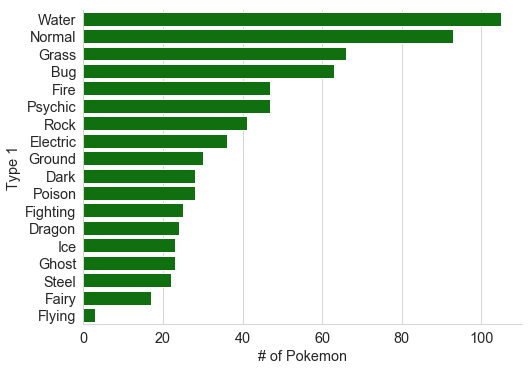

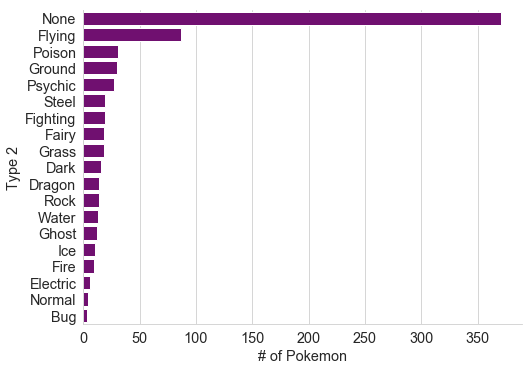

In [19]:
# Display a categorical histogram of primary types and sort by largest counts
sns.catplot(y='type 1', data=pokemonIdentityDF, kind='count',
               order=pokemonIdentityDF['type 1'].value_counts().index, 
               aspect=1.5, height=5, color='green').set_axis_labels('# of Pokemon', 'Type 1');

# Display a categorical histogram of secondary types and sort by largest counts
sns.catplot(y='type 2', data=pokemonIdentityDF, kind='count',
               order=pokemonIdentityDF['type 2'].value_counts().index, 
               aspect=1.5, height=5, color='purple').set_axis_labels('# of Pokemon', 'Type 2');


### We can draw a few conclusions from these plots:
- ### Nearly 1 in 7 Pokemon species have a secondary Flying-type.
- ### Pokemon species with Flying-type as their primary type are very rare.
- ### 近一半的Pokemon物種只有一種主要類型。
- ### Normal類型是一種非常常見的主要類型，Normal-type Pokemon的數量超過Water-type Pokemon; 
- ### 近七分之一的Pokemon物種有secondary Flying-type。
- ### 以Flying-type為主要類型的Pokemon物種非常罕見。

### Let's investigate the distribution of the various combinations of primary and secondary types of Pokemon.

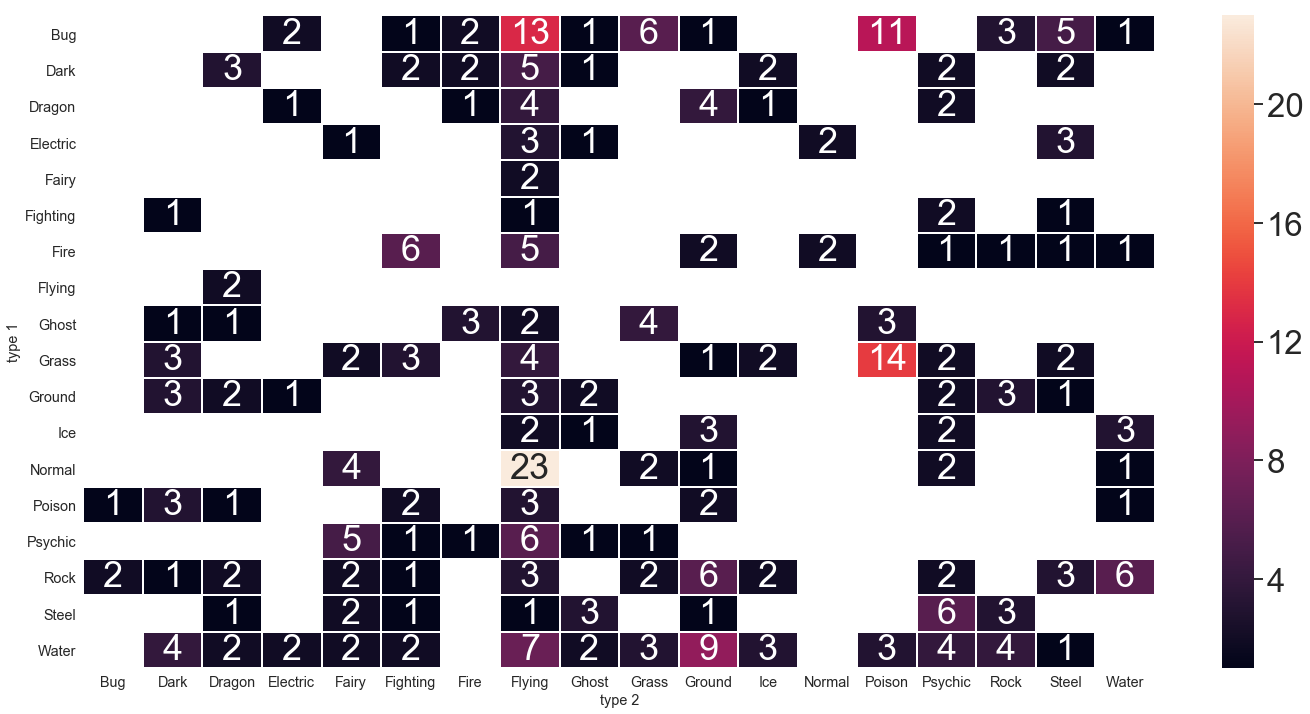

In [20]:
fig,ax = plt.subplots(figsize=(24,12))
# Improve readability
sns.set_context('talk', font_scale=2.0)
# Exclude Pokemon species without a secondary type to better highlight results
dual_types = pokemonIdentityDF[pokemonIdentityDF['type 2'] != 'None']
# heatmap
sns.heatmap(dual_types.groupby(['type 1', 'type 2']).size().unstack(), linewidths=1, annot=True, ax=ax);

## <font color='red'>Quiz 1.1-A: The above plot reveals that five most common combinations of primary and secondary type are?</font>

### Select those Pokemon with only a primary type

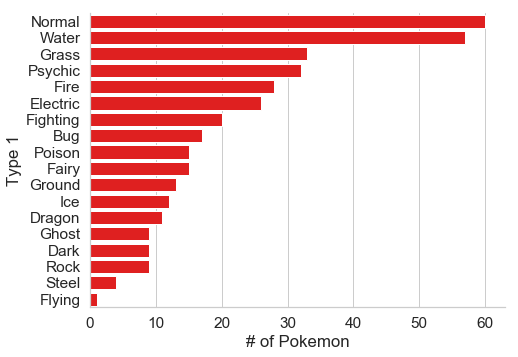

In [21]:
sns.set_context('notebook', font_scale=1.4)
single_types = pokemonIdentityDF[pokemonIdentityDF['type 2'] == 'None']
sns.catplot(y='type 1', data=single_types, kind='count',
               order=single_types['type 1'].value_counts().index, 
               aspect=1.5, height=5, color='red').set_axis_labels('# of Pokemon', 'Type 1');

[Back to Contents](#Contents)

### 1.1.4 What are the strongest and weakest Pokemon species?

In [22]:
pokemonDF.sort_values('total',ascending=False).head(10)

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
552,493,Arceus,Normal,None,720,120,120,120,120,120,120,Gen 4,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,Gen 5,True
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,Gen 4,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,Gen 2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,Gen 2,True
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,Gen 4,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,Gen 5,True
540,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,Gen 4,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,Gen 6,True
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,Gen 1,True


In [23]:
pokemonDF.sort_values('total',ascending=False).tail(10)

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
732,664,Scatterbug,Bug,None,200,38,35,40,27,25,35,Gen 6,False
139,129,Magikarp,Water,None,200,20,10,55,15,20,80,Gen 1,False
381,349,Feebas,Water,None,200,20,15,20,10,55,80,Gen 3,False
303,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,Gen 3,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,Gen 1,False
13,10,Caterpie,Bug,None,195,45,30,35,20,20,45,Gen 1,False
288,265,Wurmple,Bug,None,195,45,45,35,20,30,20,Gen 3,False
446,401,Kricketot,Bug,None,194,37,25,41,25,41,25,Gen 4,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,Gen 3,False
206,191,Sunkern,Grass,None,180,30,30,30,30,30,30,Gen 2,False


### we can see that using this metric introduces a major hurdle: at least nine Pokemon are tied for second place with a total value of 680. Similarly, it applies to the weakest list.

In [24]:
pokemonStatisticsDF.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


### Let's try a different metric: standardize the six statistic columns (except id and total) independently by converting each value into a z-score so when we do take the sum, we account for the variation in the each statistic using its mean and standard deviation across all Pokemon species. As a reminder, a [z-score](https://en.wikipedia.org/wiki/Standard_score) is defined by $$z = \frac{x-\mu}{\sigma}$$

In [25]:
cols = list(pokemonStatisticsDF.columns)
cols.remove('id')
cols.remove('total')
pokemonStatisticsDF[cols].head()

,hp,attack,defense,sp. atk,sp. def,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
4,39,52,43,60,50,65
5,58,64,58,80,65,80


In [26]:
from scipy import stats
pokemonDF.insert(len(pokemonDF.columns), 'strength', stats.zscore(pokemonStatisticsDF[cols]).sum(axis=1))

In [27]:
pokemonDF.sort_values('strength',ascending=False).head(10)

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,strength
552,493,Arceus,Normal,None,720,120,120,120,120,120,120,Gen 4,True,10.886368
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,Gen 4,True,9.566219
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,Gen 2,True,9.513600
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,Gen 2,True,9.478329
792,716,Xerneas,Fairy,None,680,126,131,95,131,98,99,Gen 6,True,9.432488
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,Gen 6,True,9.432488
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,Gen 1,True,9.400003
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,Gen 5,True,9.364839
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,Gen 4,True,9.344549
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,Gen 3,True,9.315726


In [28]:
pokemonDF.sort_values('strength',ascending=False).tail(10)

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,strength
381,349,Feebas,Water,None,200,20,15,20,10,55,80,Gen 3,False,-7.721667
139,129,Magikarp,Water,None,200,20,10,55,15,20,80,Gen 1,False,-7.823023
732,664,Scatterbug,Bug,None,200,38,35,40,27,25,35,Gen 6,False,-7.829023
303,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,Gen 3,False,-7.895801
13,10,Caterpie,Bug,None,195,45,30,35,20,20,45,Gen 1,False,-7.963072
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,Gen 1,False,-7.972482
288,265,Wurmple,Bug,None,195,45,45,35,20,30,20,Gen 3,False,-7.991838
446,401,Kricketot,Bug,None,194,37,25,41,25,41,25,Gen 4,False,-8.018578
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,Gen 3,False,-8.115452
206,191,Sunkern,Grass,None,180,30,30,30,30,30,30,Gen 2,False,-8.547151


## <font color='red'>Quiz 1.1-B: Please identify the strongest non-legendary Pokemon.</font>

[Back to Contents](#Contents)

## 1.1.5 What are the strongest and weakest types of Pokemon?
- ### Let's take a look at the strongest combinations of primary and secondary types. In addition, instead of using the mean as a measure of central tendency and assuming the strengths of each type are normally distributed, let's use the median.

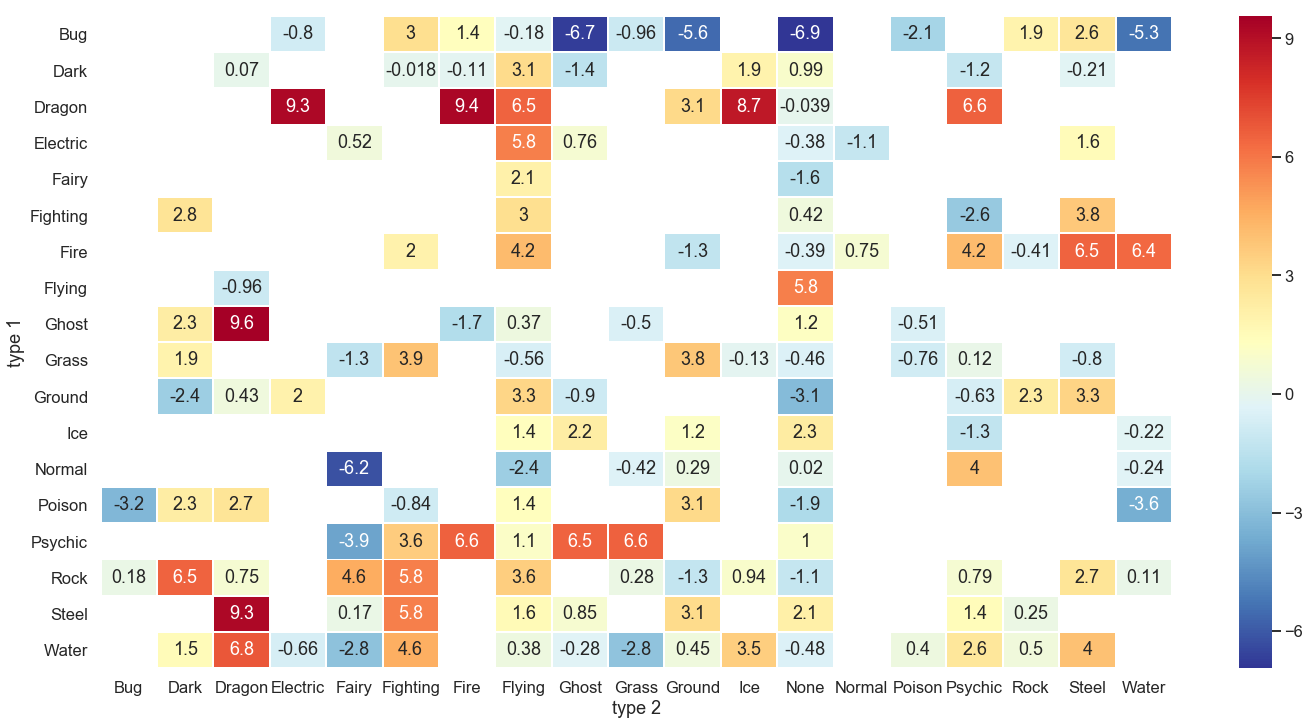

In [29]:
sns.set_context('talk', font_scale=1.0)
fig,ax = plt.subplots(figsize=(24,12))
# Calculate the median strength of each combination of primary and secondary type
medians = pokemonDF.groupby(['type 1', 'type 2']).median().loc[:, 'strength']
# Display a heatmap of the median strength of each combination of primary and secondary type
sns.heatmap(medians.unstack(), linewidths=1, cmap='RdYlBu_r', annot=True, ax=ax);

In [30]:
medians.reset_index().sort_values('strength', ascending=False).head(10)

,type 1,type 2,strength
53,Ghost,Dragon,9.566219
22,Dragon,Fire,9.364839
119,Steel,Dragon,9.306336
21,Dragon,Electric,9.300199
25,Dragon,Ice,8.708990
129,Water,Dragon,6.845791
101,Psychic,Fire,6.567809
104,Psychic,Grass,6.567809
27,Dragon,Psychic,6.566468
103,Psychic,Ghost,6.513583


## <font color='red'>Quiz 1.1-C: Please identify the five weakest combinations of primary and secondary types</font>

## <font color='red'>Quiz 1.1-4: 由於傳說的寶可夢(legendary Pokémon)物種是罕見的，而且通常比非傳說中的寶可夢(non-legendary Pokémon)強大得多，為避免混淆我們的結果。 因此，讓我們在非傳說中的寶可夢的情況下進行與上述相同的分析。亦即heapmap以及排序</font>

[Back to Contents](#Contents)

## 1.1.6 Do any types of Pokemon excel at certain statistics over others?

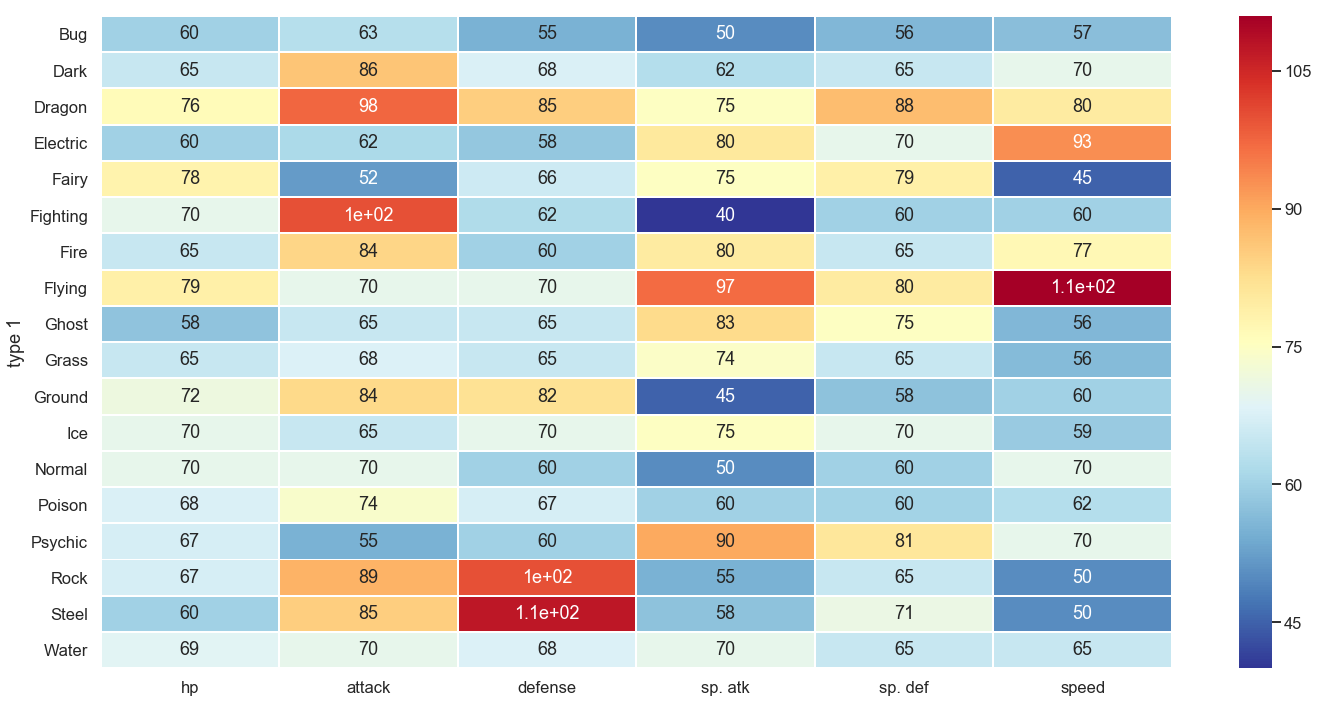

In [31]:
sns.set_context('talk', font_scale=1.0)
fig,ax = plt.subplots(figsize=(24,12))
sns.heatmap(pokemonDF.groupby('type 1').median().loc[:, 'hp':'speed'],
            linewidths=1, cmap='RdYlBu_r', annot=True, ax=ax);

## <font color='red'>Quiz 1.1-5: Please draw a few conclusions from the above heapmap</font>
## <font color='red'>Quiz 1.1-6: Please display a heapmap of the distribution of statistics across "type 1" for non-legendary Pokemon and also draw a few conclusions from the resulting heapmap.</font>

## 1.1.7 Are any of the statistics correlated?

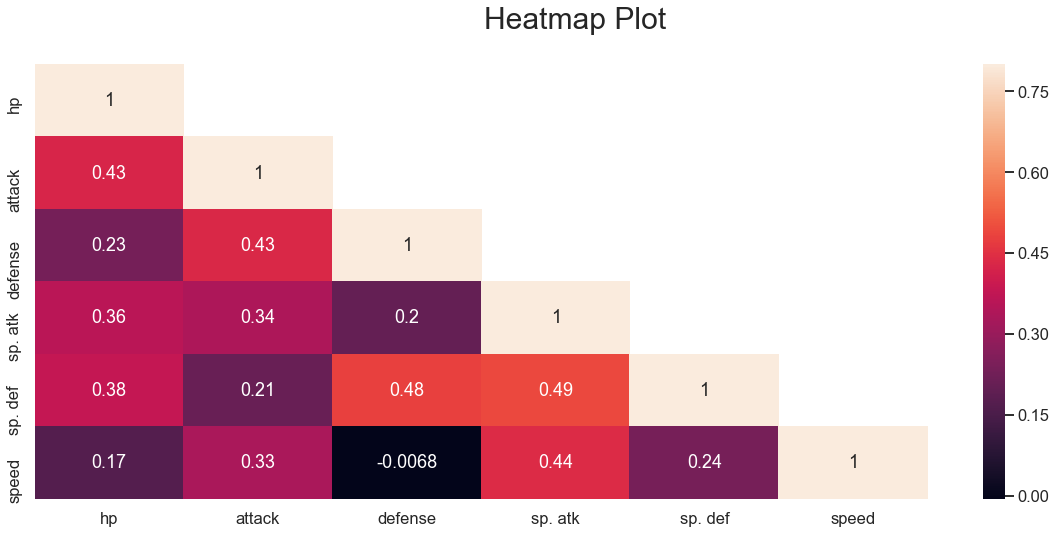

In [32]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30) 
corrcoef = pokemonDF[["hp","attack","defense","sp. atk","sp. def","speed"]].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

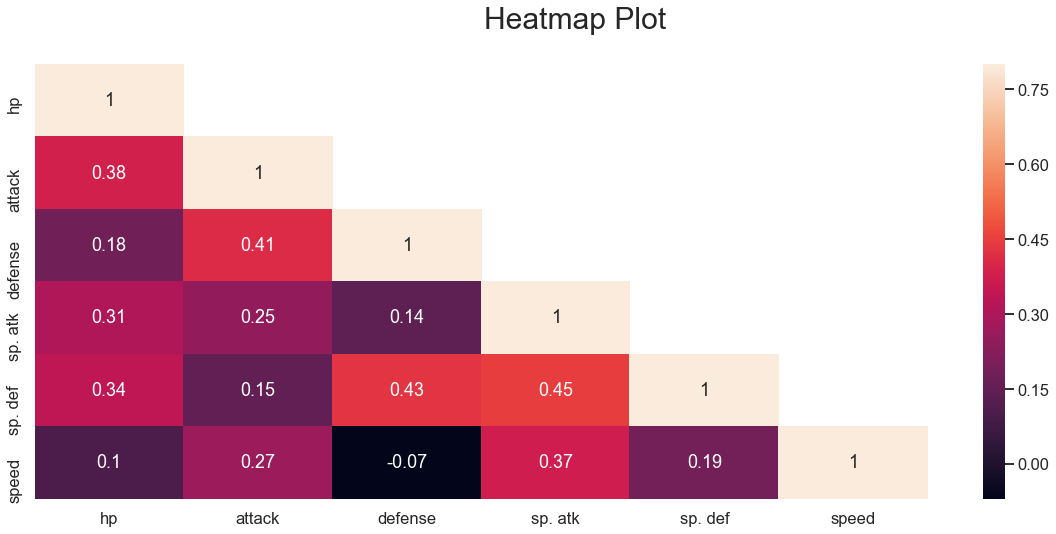

In [33]:
pokemonNoLegsDF = pokemonDF[~pokemonDF['legendary']]
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30) 
corrcoef = pokemonNoLegsDF[["hp","attack","defense","sp. atk","sp. def","speed"]].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


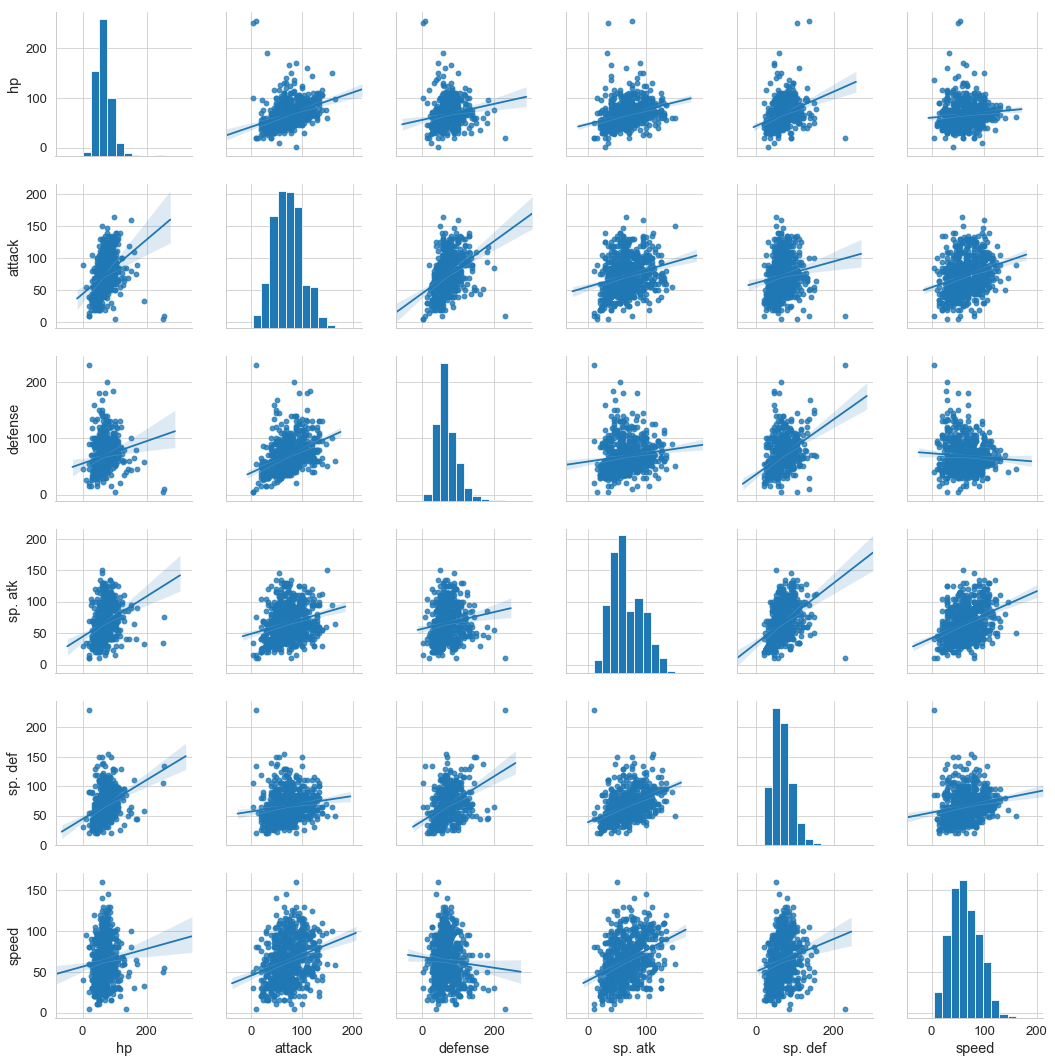

In [34]:
sns.set_context('paper', font_scale=1.5)
sns.pairplot(data = pokemonNoLegsDF[["hp","attack","defense","sp. atk","sp. def","speed"]], kind='reg');

[Back to Contents](#Contents)

## 1.1.8 Pokémon for Machine Learning

## <font color='red'>Home Work: 請提出三項見解關於怎麼樣的Pokémon資料在機器學習上會有怎麼樣的應用?不必拘於數字的資料!</font>
## 例如[Predicting Pokemon Battle Winner using Machine Learning](https://medium.com/ai-enigma/predicting-pokemon-battle-winner-using-machine-learning-d1ed055ac50)

[Back to Contents](#Contents)

## 1.2 Feature Engineering on Numeric Data

### Count

In [35]:
popsongDF = pd.read_csv(IODataDir+'/song_views.csv', encoding='utf-8')
popsongDF.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


### Binarization

In [36]:
watched = np.array(popsongDF['listen_count']) 
watched[watched >= 1] = 1
popsongDF['watched'] = watched
popsongDF.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [37]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsongDF['listen_count']])[0]
popsongDF['pd_watched'] = pd_watched
popsongDF.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


### Rounding

In [38]:
items_popularity = pd.read_csv(IODataDir+'/item_popularity.csv', encoding='utf-8')
items_popularity

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


In [39]:
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)), dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


### Interactions

In [40]:
atk_def = pokemonDF[['attack', 'defense']]
atk_def.head()

,attack,defense
0,49,49
1,62,63
2,82,83
4,52,43
5,64,58


In [41]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  100.,   150., 10000., 15000., 22500.],
       [  110.,    60., 12100.,  6600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [42]:
pd.DataFrame(pf.powers_, columns=['attack_degree', 'defense_degree'])

,attack_degree,defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [43]:
intr_features = pd.DataFrame(res, columns=['attack', 'defense', 'attack^2', 'attack x defense', 'defense^2'])
intr_features.head(5)  

,attack,defense,attack^2,attack x defense,defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,52.0,43.0,2704.0,2236.0,1849.0
4,64.0,58.0,4096.0,3712.0,3364.0


### Transforming new data in the future (during predictions)

In [44]:
new_df = pd.DataFrame([[95, 75],[121, 120], [77, 60]], columns=['attack', 'defense'])
new_df

,attack,defense
0,95,75
1,121,120
2,77,60


In [45]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res,columns=['attack', 'defense','attack^2', 
                                                  'attack x defense', 'defense^2'])
new_intr_features

,attack,defense,attack^2,attack x defense,defense^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


### Binning

In [46]:
fcc_survey_df = pd.read_csv(IODataDir+'/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


### Fixed-width binning
### Developer age distribution

In [47]:
import matplotlib as mpl
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

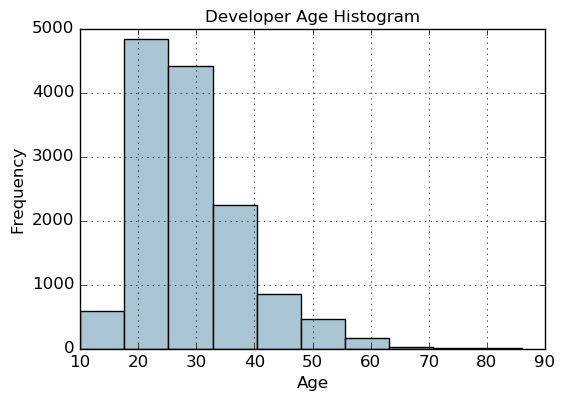

In [48]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

### Binning based on rounding

``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

In [49]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


### Binning based on custom ranges

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

In [50]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


### Quantile based binning

In [51]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


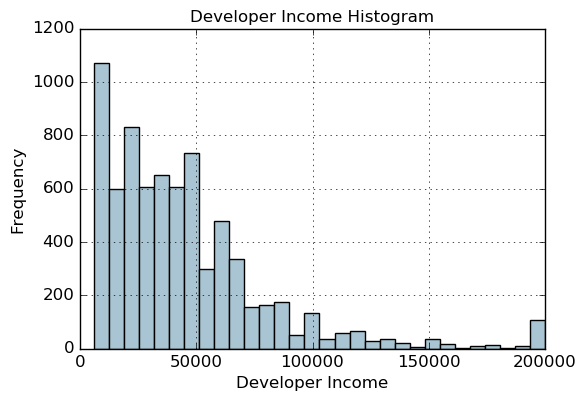

In [52]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

In [53]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

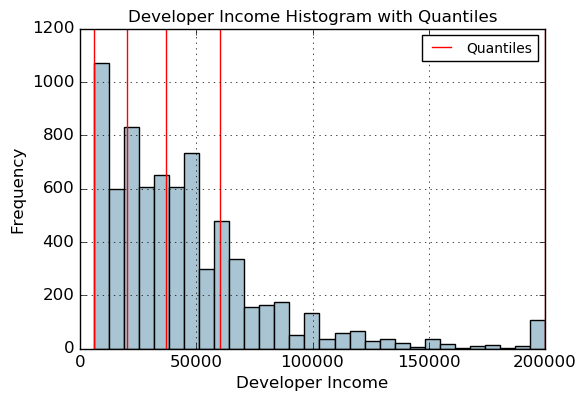

In [54]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show();

In [55]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list, labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income', 
               'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


### Mathematical Transformations
### Log transform

In [56]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


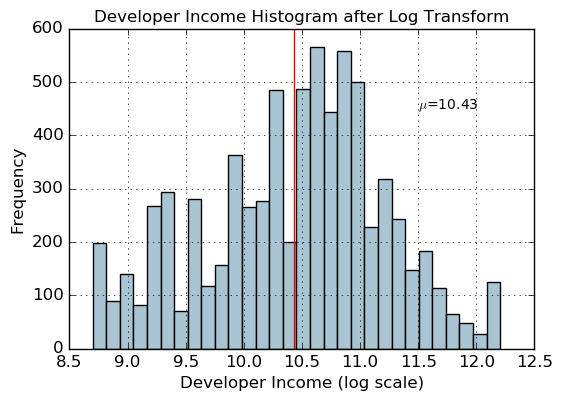

In [57]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10);

### Box–Cox transform

In [58]:
import scipy.stats as spstats
# get optimal lambda value from non null income values
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799123945557663


In [59]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox((1+fcc_survey_df['Income']), lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(fcc_survey_df['Income'], lmbda=opt_lambda)
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 
               'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1029: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180668
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115342
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346420
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115342
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637131


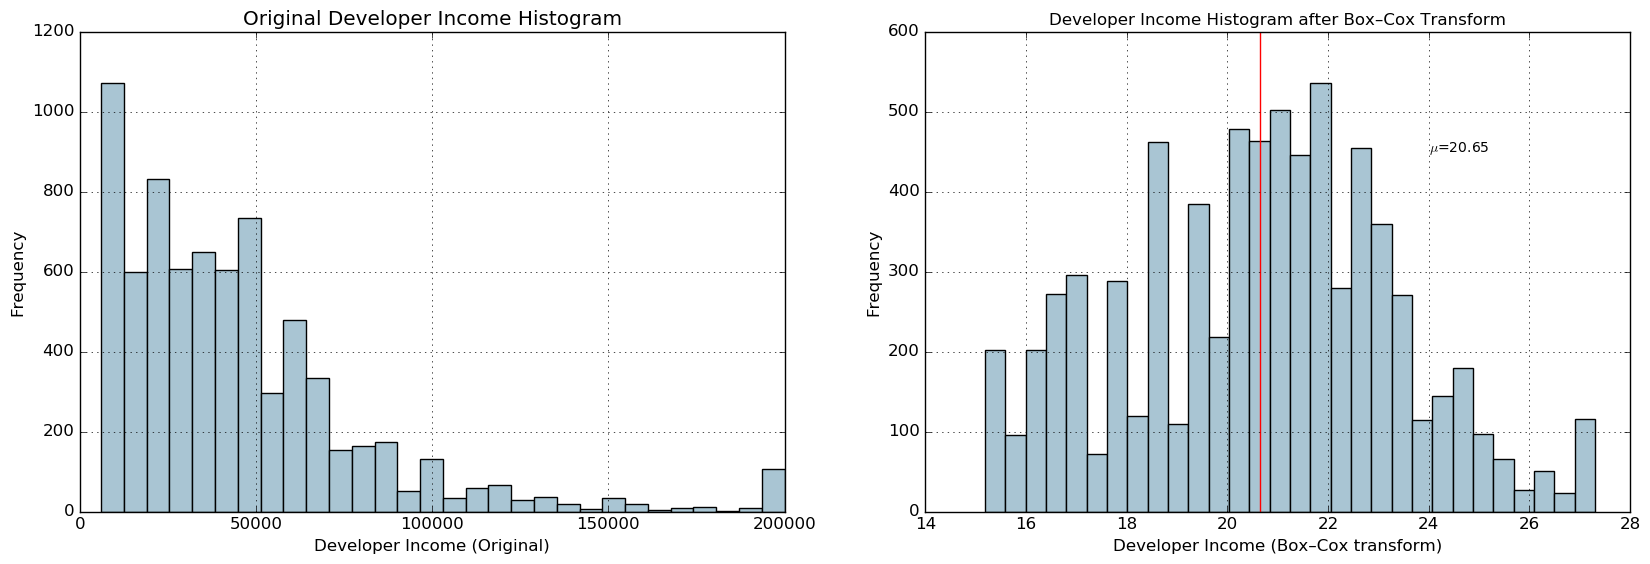

In [60]:
income_boxcox_mean = np.round(np.mean(fcc_survey_df['Income_boxcox_lambda_opt']), 2)
fig, ax = plt.subplots(1,2,figsize=(20,6))
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', ax=ax[0])
ax[0].set_title("Original Developer Income Histogram")
ax[0].set_xlabel('Developer Income (Original)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3', ax=ax[1])
plt.axvline(income_boxcox_mean, color='r')
ax[1].set_title('Developer Income Histogram after Box–Cox Transform', fontsize=12)
ax[1].set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)
plt.show();

[Back to Contents](#Contents)

## 1.3 Feature Engineering on Categorical Data

### Transforming Nominal Features

In [61]:
vg_df = pd.read_csv(IODataDir+'/vgsales.csv', encoding='utf-8')
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [62]:
side_by_side(vg_df['Genre'].unique(), vg_df['Genre'].nunique())

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',    12
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',            
       'Strategy'], dtype=object)                                             



In [63]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [64]:
vg_df['GenreLabel'] = genre_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


### Transforming Ordinal Features

In [65]:
side_by_side(pokemonDF['generation'].unique(), pokemonDF['generation'].nunique())

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)    6



In [66]:
pokemonTempDF = pokemonDF.copy()

#### need to hand-craft this using our own logic

In [67]:
gen_ord_map = {'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3, 
               'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6}
pokemonTempDF['generationLabel'] = pokemonTempDF['generation'].map(gen_ord_map)
pokemonTempDF[['name', 'generation', 'generationLabel']].sample(5)

,name,generation,generationLabel
522,Glaceon,Gen 4,4
173,Croconaw,Gen 2,2
149,Omanyte,Gen 1,1
128,Seaking,Gen 1,1
26,Spearow,Gen 1,1


### Encoding Categorical Features - When there is no notion of magnitude (e.g. 'generation')
### There are several schemes and strategies where dummy features are created for each unique value or label out of all the distinct categories in any feature. 
- ### one-hot encoding, 
- ### dummy coding, 
- ### effect coding,
- ### feature hashing

### One-hot encoding

In [68]:
pokemonOriginalDF = pokemonDF.copy()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# transform and map pokemon generations
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(pokemonDF['generation'])

In [69]:
len(gen_labels)

721

In [70]:
pokemonDF['generationLabel'] = gen_labels
pokemonDF.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,strength,generationLabel
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False,-3.596849,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False,-0.461052,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False,3.857508,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,Gen 1,False,-3.928979,0
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,Gen 1,False,-0.465334,0


In [71]:
# encode generation labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(pokemonDF[['generationLabel']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)

In [72]:
gen_features.head()

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [73]:
poke_df_ohe = pd.concat([pokemonDF, gen_features], axis=1)
poke_df_ohe.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,...,generation,legendary,strength,generationLabel,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,1.0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,...,Gen 1,False,-3.596849,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,...,Gen 1,False,-0.461052,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,...,Gen 1,False,3.857508,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,Charmander,Fire,None,309.0,39.0,52.0,43.0,60.0,50.0,...,Gen 1,False,-3.928979,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### <font color='red'>To avoid that pandas concat generates NaN valuse, do reset_index if ndexes values are not necessary</font>

In [74]:
poke_df_ohe = pd.concat([pokemonDF.reset_index(drop=True), gen_features.reset_index(drop=True)], axis=1)
columns = sum([['name', 'generation', 'generationLabel'],gen_feature_labels], [])
poke_df_ohe[columns].head()

,name,generation,generationLabel,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,Bulbasaur,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ivysaur,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,Venusaur,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,Charmander,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0
4,Charmeleon,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0


## <font color='red'>Quiz 1.3: Please encode 'legendary' status labels using one-hot encoding scheme</font>

### Suppose we used this data in training and building a model but now we have some new Pokémon data for which we need to engineer the same features before we want to run it by our trained model

In [75]:
new_poke_df = pd.DataFrame([['PikaZoom', 'Gen 3'], ['CharMyToast', 'Gen 4']],
                           columns=['name', 'generation'])
new_gen_labels = gen_le.transform(new_poke_df['generation'])
new_poke_df['generationLabel'] = new_gen_labels
new_poke_df[['name', 'generation', 'generationLabel']]

,name,generation,generationLabel
0,PikaZoom,Gen 3,2
1,CharMyToast,Gen 4,3


In [76]:
new_gen_feature_arr = gen_ohe.transform(new_poke_df[['generationLabel']]).toarray()
new_gen_features = pd.DataFrame(new_gen_feature_arr, columns=gen_feature_labels)
new_poke_ohe = pd.concat([new_poke_df, new_gen_features], axis=1)
columns = sum([['name', 'generation', 'generationLabel'], gen_feature_labels], [])
new_poke_ohe[columns]

,name,generation,generationLabel,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,PikaZoom,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0
1,CharMyToast,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0


### Dummy Coding Scheme
### The dummy coding scheme is similar to the one hot encoding scheme, except in the case of dummy coding scheme, when applied on a categorical feature with m distinct labels, we get m-1 binary features. Thus each value of the categorical variable gets converted into a vector of size m-1. The extra feature is completely disregarded and thus if the category values range from {0, 1, ..., m-1} the 0th or the m-1th feature is usually represented by a vector of all zeros (0).

In [77]:
pokemonOriginalDF.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,strength
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False,-3.596849
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False,-0.461052
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False,3.857508
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,Gen 1,False,-3.928979
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,Gen 1,False,-0.465334


In [78]:
# dropping the first level binary encoded feature (Gen 1)
dummyFeaturesDropFirst = pd.get_dummies(pokemonOriginalDF['generation'], drop_first=True)
# drop the last level binary encoded feature (Gen 6)
dummyFeatures = pd.get_dummies(pokemonOriginalDF['generation'])
dummyFeaturesDropLast = dummyFeatures.iloc[:,:-1]
side_by_side(pd.concat([pokemonOriginalDF[['name', 'generation']], dummyFeaturesDropFirst], axis=1).sample(5),
             pd.concat([pokemonOriginalDF[['name', 'generation']], dummyFeaturesDropLast], axis=1).sample(5))

                    name generation  Gen 2  Gen 3  Gen 4  Gen 5  Gen 6             name generation  Gen 1  Gen 2  Gen 3  Gen 4  Gen 5
727             Bunnelby      Gen 6      0      0      0      0      1    159   Dratini      Gen 1      1      0      0      0      0
635              Gothita      Gen 5      0      0      0      1      0    274  Sceptile      Gen 3      0      0      1      0      0
458  WormadamPlant Cloak      Gen 4      0      0      1      0      0    27     Fearow      Gen 1      1      0      0      0      0
344              Roselia      Gen 3      0      1      0      0      0    562  Samurott      Gen 5      0      0      0      0      1
689             Braviary      Gen 5      0      0      0      1      0    147   Flareon      Gen 1      1      0      0      0      0



### Effect Coding Scheme
- ### The effect coding scheme is very similar to the dummy coding scheme in most aspects. However, the encoded features or feature vector, for the category values that represent all 0s in the dummy coding scheme, is replaced by -1s in the effect coding scheme.

In [79]:
gen_onehot_features = pd.get_dummies(pokemonOriginalDF['generation'])
gen_effect_features = gen_onehot_features.iloc[:,:-1]
gen_effect_features.loc[np.all(gen_effect_features == 0, axis=1)] = -1.
pd.concat([pokemonOriginalDF[['name', 'generation']], gen_effect_features], axis=1).tail()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,name,generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
793,Yveltal,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
794,Zygarde50% Forme,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
795,Diancie,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
797,HoopaHoopa Confined,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
799,Volcanion,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0


In [80]:
gen_effect_features.head(-10)

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0
10,1.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0,0.0
13,1.0,0.0,0.0,0.0,0.0


### Feature Hashing scheme
- ### The feature hashing scheme is for dealing with large scale categorical features. Hashing schemes work on strings, numbers and other structures like vectors. The hashed outputs as a finite set of h bins such that when hash function is applied on the same values, they get assigned to the same bin out of the h bins based on the hash value.

In [81]:
side_by_side(vg_df['Genre'].nunique(),  vg_df['Genre'].unique())

12    array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
             'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',      
             'Strategy'], dtype=object)                                       



In [82]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(vg_df['Genre'])
hashed_features = hashed_features.toarray()
pd.concat([vg_df[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]

,Name,Genre,0,1,2,3,4,5
1,Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0
2,Mario Kart Wii,Racing,-1.0,0.0,0.0,0.0,0.0,-1.0
3,Wii Sports Resort,Sports,-2.0,2.0,0.0,-2.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,-1.0,1.0,2.0,0.0,1.0,-1.0
5,Tetris,Puzzle,0.0,1.0,1.0,-2.0,1.0,-1.0
6,New Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0


### We can clearly see from the output that there are 12 distinct genres and if we used a one hot encoding scheme on the Genre feature, we would end up having 12 binary features. However, if we use the feature hashing scheme instead, we can set the feature vector size to be 6 (6 features instead of 12).

[Back to Contents](#Contents)

## 1.4 Feature Engineering on Text Data

## 1.5 Feature Engineering on Temporal Data

## 1.6 Feature Engineering on Image Data

## 1.7 Feature Scaling

## 1.8 Feature Selection

## 1.9 Dimensionality Reduction

[Back to Contents](#Contents)

[Back to Contents](#Contents)

[Back to Contents](#Contents)

[Back to Contents](#Contents)

[Back to Contents](#Contents)

[Back to Contents](#Contents)